In [1]:
import torch.nn as nn
import torchvision.models as models
import torch
import numpy as np
import cv2
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import Dataset, DataLoader

%matplotlib inline

c:\Users\thdam\miniconda3\envs\wsi\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet18

In [3]:
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                            [0.229, 0.224, 0.225])])

In [31]:
img_path = r'E:\Final Year project\dataset1\D\Image_1672049058.1220164.jpg'

In [32]:
img = cv2.imread(img_path)
img0 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

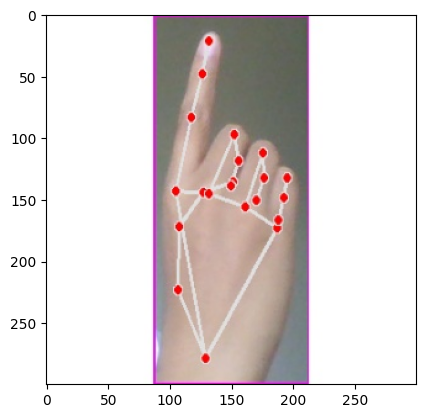

In [33]:
plt.imshow(img0)

In [170]:
white_pixels = np.where(
        (img0[:, :, 0] == 255) & 
        (img0[:, :, 1] == 255) & 
        (img0[:, :, 2] == 255)
        )

img0[white_pixels] = [0, 0, 0]

In [34]:
img_tensor = img_transform(img0)

In [35]:
img_inp = img_tensor.unsqueeze(0)

In [36]:
img_inp.shape

torch.Size([1, 3, 300, 300])

In [174]:
# from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
# from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
# from pytorch_grad_cam.utils.image import show_cam_on_image
# from torchvision.models import resnet18

model = resnet18(pretrained=True)
target_layers = [model.layer4[-1]]
input_tensor = img_inp

In [37]:
weight = r'E:\Final Year project\code\weights\SGD\resnet34_CrossEntropy_SGD_30.pt'

model = resnet18(pretrained = False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 6)
model.load_state_dict(torch.load(weight))

c:\Users\thdam\miniconda3\envs\wsi\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\thdam\miniconda3\envs\wsi\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


<All keys matched successfully>

In [39]:
target_layers = [model.layer4[-1]]
input_tensor = img_inp

In [40]:
cam = GradCAM(model=model, target_layers=target_layers)

In [43]:
targets = [ClassifierOutputTarget(3)]

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]

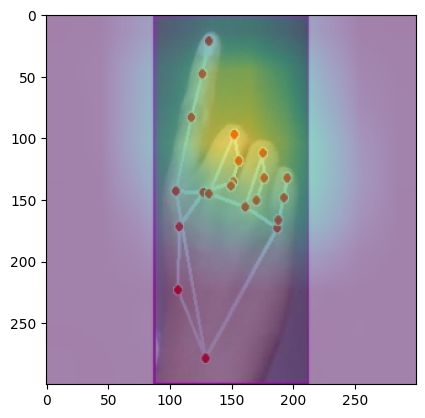

In [44]:
plt.imshow(img0)
plt.imshow(grayscale_cam, alpha = 0.5)